# 1. 단항 논리 회귀 실습
* 논리 회귀(Logistic Regression)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

![](https://i.imgur.com/nE29yVL.png)
> 직선 하나(선형 회귀)를 사용해서 예측한다면 제대로 예측할 수 없음(정확도가 떨어짐)


![](https://i.imgur.com/guvMfkf.png)

> Sigmoid 함수(Logistic 함수)를 사용하여 정확도를 높임



### Sigmoid 함수
* 예측값이 0에서 1사이 값이 되도록 만듦
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분

![](https://i.imgur.com/6NsfKMa.png)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(10) #  동일한 코드를 실행할 때마다 동일한 난수 시퀀스를 얻을 수 있도함, 모델 초기화나 데이터 분할 등에서 난수를 사용하는 경우에 일관된 결과를 얻을 수 있음

In [ ]:
x_train = torch.FloatTensor([[0], [1], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [1], [1], [1]])  # 11시간 공부한것부터 합격

print(x_train.shape, y_train.shape)

torch.Size([7, 1]) torch.Size([7, 1])


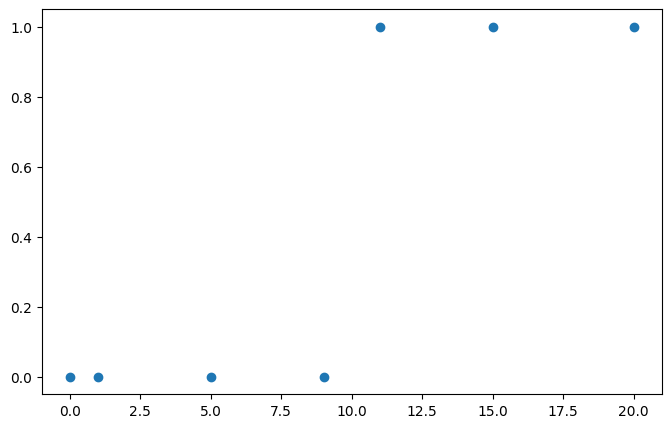

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [ ]:
# Sequential(): Pytorch에서 머신러닝/딥러닝 모델을 만들때 여러가지 레이어를 합칠 때 사용하는 메서드
model = nn.Sequential(
    nn.Linear(1, 1),  # 선형회귀
    nn.Sigmoid()      # 시그모이드 함수를 거쳐서
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [ ]:
print(list(model.parameters()))  # 임의의 값(학습 전)

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여  Loss를 계산
* BCE: Binary Cross Entropy

<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [ ]:
y_pred = model(x_train)
y_pred  # 의미없는 결과(학습 전)

tensor([[0.4914],
        [0.4705],
        [0.3885],
        [0.3124],
        [0.2776],
        [0.2156],
        [0.1530]], grad_fn=<SigmoidBackward0>)

In [ ]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.9817, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.BCELoss()(y_pred, y_train)

  optimizer.zero_grad()  # 초기화
  loss.backward()        # 역전파
  optimizer.step()       # 업데이트

  # 100번마다 프린트
  if epoch % 100 ==0:
    print(f'Epoch: {epoch}/{epochs}  Loss: {loss: 6f}')

Epoch: 0/1000  Loss:  0.981661
Epoch: 100/1000  Loss:  0.553075
Epoch: 200/1000  Loss:  0.511940
Epoch: 300/1000  Loss:  0.477264
Epoch: 400/1000  Loss:  0.447859
Epoch: 500/1000  Loss:  0.422748
Epoch: 600/1000  Loss:  0.401144
Epoch: 700/1000  Loss:  0.382415
Epoch: 800/1000  Loss:  0.366056
Epoch: 900/1000  Loss:  0.351666
Epoch: 1000/1000  Loss:  0.338921


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2138]], requires_grad=True), Parameter containing:
tensor([-1.6024], requires_grad=True)]


In [ ]:
# 2.5와 15.5의 테스트값으로 예측
x_test = torch.FloatTensor([[2.5], [15.5]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.2558],
        [0.8470]], grad_fn=<SigmoidBackward0>)


In [ ]:
# 임계치 설정하기
# 0.5 보다 크거나 같으면 1, 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()  # float형으로
print(y_bool)  # 2.5는 0, 15.5는 1로 예측함

tensor([[0.],
        [1.]])


# 2. 다항 논리 회귀 실습


In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [0, 0, 0, 1, 1, 1, 2, 2]  # 결과가 3개

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)  # Long형 Tensor

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
# Sequential() : 하나의 레이어만 있어도 써주는것이 좋음!(순서 중요)
model = nn.Sequential(
    nn.Linear(4,3)  # 4개의 입력(독립변수), 3개의 출력
)
print(model)


Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [ ]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1358,  1.5655, -0.0104],
        [-1.0986,  1.3559,  0.5590],
        [-1.4625,  1.2105,  0.7214],
        [-2.3103,  1.4702,  1.2348],
        [-1.0576,  3.7047,  0.7548],
        [-1.7209,  1.1885,  1.0922],
        [-1.5469,  3.1835,  1.0722],
        [-1.8061,  3.6010,  1.2775]], grad_fn=<AddmmBackward0>)


In [ ]:
# 다항 논리 회귀에서는 BCELoss() 함수 대신에 CrossEntropyLoss() 함수를 사용
# CrossEntropyLoss(): softmax 함수가 포함되어있음
# softmax 함수: 클래스의 개수만큼 확률을 반환(0일 확률, 1일 확률, 2일 확률)
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.7613, grad_fn=<NllLossBackward0>)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)  # softmax 포함, 내부적으로 원핫인코딩 -> 각각의 확률 반환

  optimizer.zero_grad()  # 초기화
  loss.backward()        # 역전파
  optimizer.step()       # 업데이트

  # 100번마다 프린트
  if epoch % 100 ==0:
    print(f'Epoch: {epoch}/{epochs}  Loss: {loss: 6f}')

Epoch: 0/1000  Loss:  1.761291
Epoch: 100/1000  Loss:  0.633731
Epoch: 200/1000  Loss:  0.550764
Epoch: 300/1000  Loss:  0.497095
Epoch: 400/1000  Loss:  0.453218
Epoch: 500/1000  Loss:  0.413998
Epoch: 600/1000  Loss:  0.377086
Epoch: 700/1000  Loss:  0.340971
Epoch: 800/1000  Loss:  0.304561
Epoch: 900/1000  Loss:  0.268060
Epoch: 1000/1000  Loss:  0.242054


In [ ]:
x_test = torch.FloatTensor([[1,2,5,6]])
y_pred = model(x_test)
y_pred

tensor([[-4.9985,  3.4779,  2.0804]], grad_fn=<AddmmBackward0>)

In [ ]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred) # 1차원 데이터를 넣음
y_prob

tensor([[1.6701e-04, 8.0166e-01, 1.9817e-01]], grad_fn=<SoftmaxBackward0>)

In [ ]:
1.3139e-04

0.00013139

In [ ]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.80
2일 확률: 0.20


In [ ]:
# argmax: y_prob에서 가장 큰 값의 인덱스를 반환하는 연산
# axis=1 매개변수는 텐서의 두 번째 차원을 따라 연산을 수행하라는 것
torch.argmax(y_prob, axis=1)

tensor([1])

# 3. 와인 품종 예측해보기
* sklearn.datasets.load_wine 데이터셋은 이탈리아의 같은 지역에서 재배된 세가지 다른 품종으로 와인을 화학적으로 분석한 결과


### 문제
* 13개의 성분을 분석하여 어떤 와인인지 맞춰보자
* 단, 학습데이터 80%/테스트데이터 20%로 하며, 테스트 데이터의 0번 인덱스가 어떤 와인인지, 테스트 정확도를 출력


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [ ]:
# 데이터셋을 로드할 때 바로 데이터를 분리하고 데이터프레임으로 만들기
x_data, y_data = load_wine(return_X_y=True, as_frame=True)

In [ ]:
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

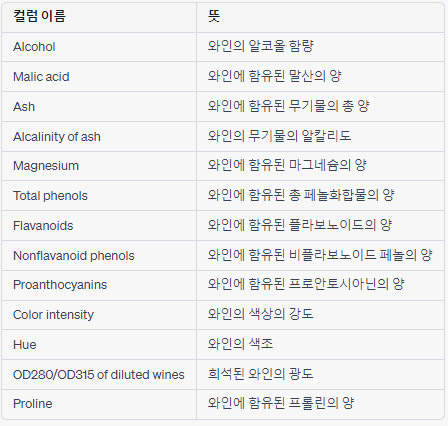

In [ ]:
# 데이터 텐서형으로 변환
# x_data = torch.FloatTensor(x_data.values)  # 기울기 연산을 해야하기 때문에 실수
# y_data = torch.LongTensor(y_data.values)  # 클래스(자연수)

# print(x_data.shape)
# print(y_data.shape)
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [ ]:
# 학습 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split

In [ ]:
# 클래스를 원핫인코딩 해줌
y_one_hot = nn.functional.one_hot(y_data, num_classes=3).float()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142, 3])
torch.Size([36, 13]) torch.Size([36, 3])


In [ ]:
# 모델 만들기
# model = nn.Sequential(
#     nn.Linear(13, 3) # softmax가 포함되어있기 때문에 Sigmoid()필요 x
# )

# optimizer = optim.SGD(model.parameters(), lr =0.01)

# epochs = 1000

# for epoch in range(epochs + 1):
#   y_pred = model(x_train)
#   loss = nn.CrossEntropyLoss()(y_pred, y_train)  # 다항 논리 회귀

#   optimizer.zero_grad()  # 초기화
#   loss.backward()        # 역전파
#   optimizer.step()       # 업데이트(W,b)

#   # 100번마다 로그 프린트
#   if epoch % 100 == 0:
#     y_prob = nn.Softmax(1)(y_pred)   # 1차원이 데이터를 넣음
#     y_pred_index = torch.argmax(y_prob, axis=1)
#     y_train_index = torch.argmax(y_train, axis=1)
#     accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
#     print(f'Epoch: {epoch}/{epochs}  Loss: {loss: 6f}  Accuracy : {accuracy: 2f}%')
model = nn.Sequential(
    nn.Linear(13, 3)
)

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_train_index = torch.argmax(y_train, axis=1)
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
        print(f'Epoch { epoch:4d}/{epochs} Loss: {loss:.6f} Accuracy: {accuracy:.2f}%')


Epoch    0/1000 Loss: 159.442169 Accuracy: 28.17%
Epoch  100/1000 Loss: 1479.122559 Accuracy: 36.62%
Epoch  200/1000 Loss: 467.176453 Accuracy: 38.03%
Epoch  300/1000 Loss: 223.118362 Accuracy: 51.41%
Epoch  400/1000 Loss: 412.117828 Accuracy: 59.86%
Epoch  500/1000 Loss: 1110.109985 Accuracy: 62.68%
Epoch  600/1000 Loss: 305.942291 Accuracy: 57.04%
Epoch  700/1000 Loss: 203.408081 Accuracy: 63.38%
Epoch  800/1000 Loss: 132.940063 Accuracy: 69.72%
Epoch  900/1000 Loss: 414.166290 Accuracy: 66.20%
Epoch 1000/1000 Loss: 336.499603 Accuracy: 59.15%


# 4. 경사 하강법의 종류


### Batch size
* 배치 사이즈(batch size)는 경사 하강법 알고리즘에서 한 번의 파라미터 업데이트를 위해 사용되는 학습 데이터의 샘플 개수
* 즉, 학습 데이터를 작은 묶음(batch)으로 나누어서 모델을 학습하는 방법
* 일반적으로 배치 사이즈는 하이퍼파라미터로 설정되며, 선택하는 방법은 다양
* 작은 배치 사이즈는 메모리 사용량이 적고 계산 효율성이 높지만, 노이즈가 많을 수 있음
* 큰 배치 사이즈는 메모리 사용량이 늘어나고 계산 효율성이 감소하지만, 더 안정적인 그래디언트 추정치를 얻을 수 있음

### 4-1. 배치 경사 하강법
* 가장 기본적인 경사 하강법(Vanilla Gradient Descent)
* 데이터셋 전체를 고려하여 손실함수를 계산
* 한 번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행
* Batch의 개수와 Iteraion은 1이고 Batch size는 전체 데이터의 개수
* 파라미터 업데이트 할 때 한 번에 전체 데이터셋을 고려하기 때문에 모델 학습 시 많은 시간과 메모리가 필요하다는 단점



### 4-2. 확률적 경사 하강법
* 확률적 경사 하강법(SGD, Stochastic Gredient Descent)은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch size를 1로 설정하고 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행
* 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길 수 있음

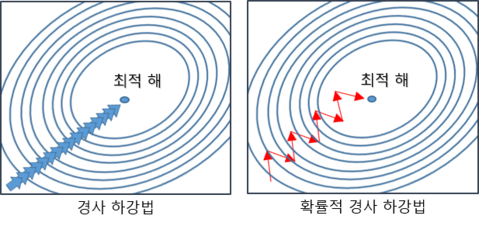

### 4-3. 미니 배치 경사 하강법
* 미니 배치 경사하강법(Mini-batch Gradient Descent)은 Batch size가 1도 전체 데이터 개수도 아닌 경우
* 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch size를 32, 64, 128과 같이 2의 n제곱에 해당하는 값으로 사용하는게 보편적 (CPU 내부 설계 자체가 2의 n제곱 연산이 가장 속도가 빠르기 때문에)

# 5. 경사하강법의 여러가지 기술들


### 5-1. 확률적 경사 하강법(SGD)
* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법


### 5-2. 모멘텀(Momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더 해줌
* 접선의 기울기에 한 시점 이전의 접선의 기울기 값을 일정한 비율만큼 반영
* 언덕에서 공이 내려올 때 중간의 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있음
* local minimum에서 빠져나올 수 있도록 함

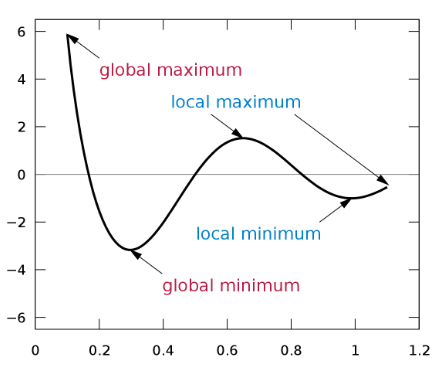

### 5-3. 아다그라드(Adagrad)
* 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
* AdaGrad는 Feature별로 학습률(Learning rate)을 Adaptive하게, 즉 다르게 조절하는 것이 특징
* 처음에는 크게 학습하다가 작게 학습시킴



### 5-4. 아담(Adam)
* 아다그라드 + 모멘텀
*  학습의 방향과 크기(=Learning rate)를 모두 개선한 기법으로 딥러닝에서 가장 많이 사용되어 "오던" 최적화 기법
* 여러 기술들이 합쳐졌기 때문에 속도가 느릴  수 있음


In [ ]:
# Adam으로 바꿔서 다시 학습 - Accuracy가 매우 좋아짐!
model = nn.Sequential(
    nn.Linear(13, 3)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)  # 클래스별 확률을 반환(차원을 1)
        y_pred_index = torch.argmax(y_prob, axis=1)   # 각 샘플별로 클래스별 확률 중 가장 큰값을 가지는 클래스의 인덱스값(axis=1:각 행에서)
        y_train_index = torch.argmax(y_train, axis=1)   # 실제 클래스 레이블에서 각 샘플별로 가장 큰 값을 가지는 클래스의 인덱스(axis=1: 각 행에서)
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100   # bool값으로 반환된 데이터를 float으로 형변환 후 더함
        print(f'Epoch { epoch:4d}/{epochs} Loss: {loss:.6f} Accuracy: {accuracy:.2f}%')

Epoch    0/1000 Loss: 171.310867 Accuracy: 28.87%
Epoch  100/1000 Loss: 0.217588 Accuracy: 92.96%
Epoch  200/1000 Loss: 0.160176 Accuracy: 97.18%
Epoch  300/1000 Loss: 0.133412 Accuracy: 97.18%
Epoch  400/1000 Loss: 0.117160 Accuracy: 97.89%
Epoch  500/1000 Loss: 0.105806 Accuracy: 97.89%
Epoch  600/1000 Loss: 0.097185 Accuracy: 97.89%
Epoch  700/1000 Loss: 0.090310 Accuracy: 97.89%
Epoch  800/1000 Loss: 0.084636 Accuracy: 97.89%
Epoch  900/1000 Loss: 0.079820 Accuracy: 97.89%
Epoch 1000/1000 Loss: 0.075642 Accuracy: 97.89%


In [ ]:
y_pred = model(x_test)
y_pred[:5]

tensor([[38.3035, 41.4661, 36.4269],
        [23.5532, 30.4381, 23.5679],
        [48.5956, 47.4519, 42.9946],
        [29.9729, 36.5060, 29.0688],
        [65.1588, 60.0035, 59.2508]], grad_fn=<SliceBackward0>)

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[:5]  # 예측값에 대한 확률

tensor([[4.0348e-02, 9.5347e-01, 6.1778e-03],
        [1.0210e-03, 9.9794e-01, 1.0361e-03],
        [7.5624e-01, 2.4096e-01, 2.7938e-03],
        [1.4515e-03, 9.9796e-01, 5.8772e-04],
        [9.9158e-01, 5.7203e-03, 2.6948e-03]], grad_fn=<SliceBackward0>)

In [ ]:
print(f'0번 품종일 확률: {y_prob[0][0]: .2f}')
print(f'1번 품종일 확률: {y_prob[0][1]: .2f}')
print(f'2번 품종일 확률: {y_prob[0][2]: .2f}')

0번 품종일 확률:  0.04
1번 품종일 확률:  0.95
2번 품종일 확률:  0.01


In [ ]:
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)  # 예측된 레이블에서 각 샘플별로 가장 큰 값을 가지는 클래스의 인덱스(axis=1: 각 행에서)
accuracy = (y_test_index == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다')

테스트 정확도는 88.89% 입니다
